<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2  -q --user

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Input, Dropout,BatchNormalization
from keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/optimize-NN/module-proj/Churn.csv")

## Data Overview

### Displaying the first few rows of the dataset

In [ ]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Displaying the last few rows of the dataset

In [ ]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Checking the data types of the columns of the dataset

In [ ]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.


### Checking for duplicate values

In [ ]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

*   There are no duplcated values



In [ ]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

*   There are no missing values

In [ ]:
Data["Exited"].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

*   Around 80% of customers are still with the bank
*   20% of customers left the bank



In [ ]:
Data["HasCrCard"].value_counts(1)

HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64

In [ ]:
Data["IsActiveMember"].value_counts(1)

IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* Row is unique per customer
* Average credit score of customer is 650, some customers have high credit score of 850
* Mean age of customer is 37 and 75% of customer age is at 44.There is big difference between age at 75%  and max age of 92, which indicates possibility of outliers.
* 50% of customers have tenure of 5 years .
* Average balance customer maintains is 76000, there is huge difference between minimum balance 0 to max balance of 250k
* 50% of Customers use 2 products
* 70% Customers have credit cards
* 51% Customers are active
* Avergae estimated salary of customers is 100000

In [ ]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Each value of the column 'RowNumber',CustomerId are a uniquefor customers. Hence we can drop this columns as these will not add any predictive power or value to the model.
* Estimated Salary has almost all unique values. This field need to be probed further to see if its value add to the model.

In [ ]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


* Smith,Scott,Martin,Walker and Brown are common surnames.
* 55% of customers are males.
* Half of the customers are from France.

## Exploratory Data Analysis

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Surname

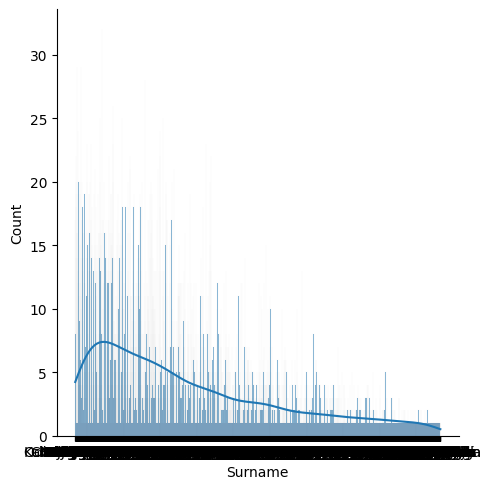

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Surname', kde=True)

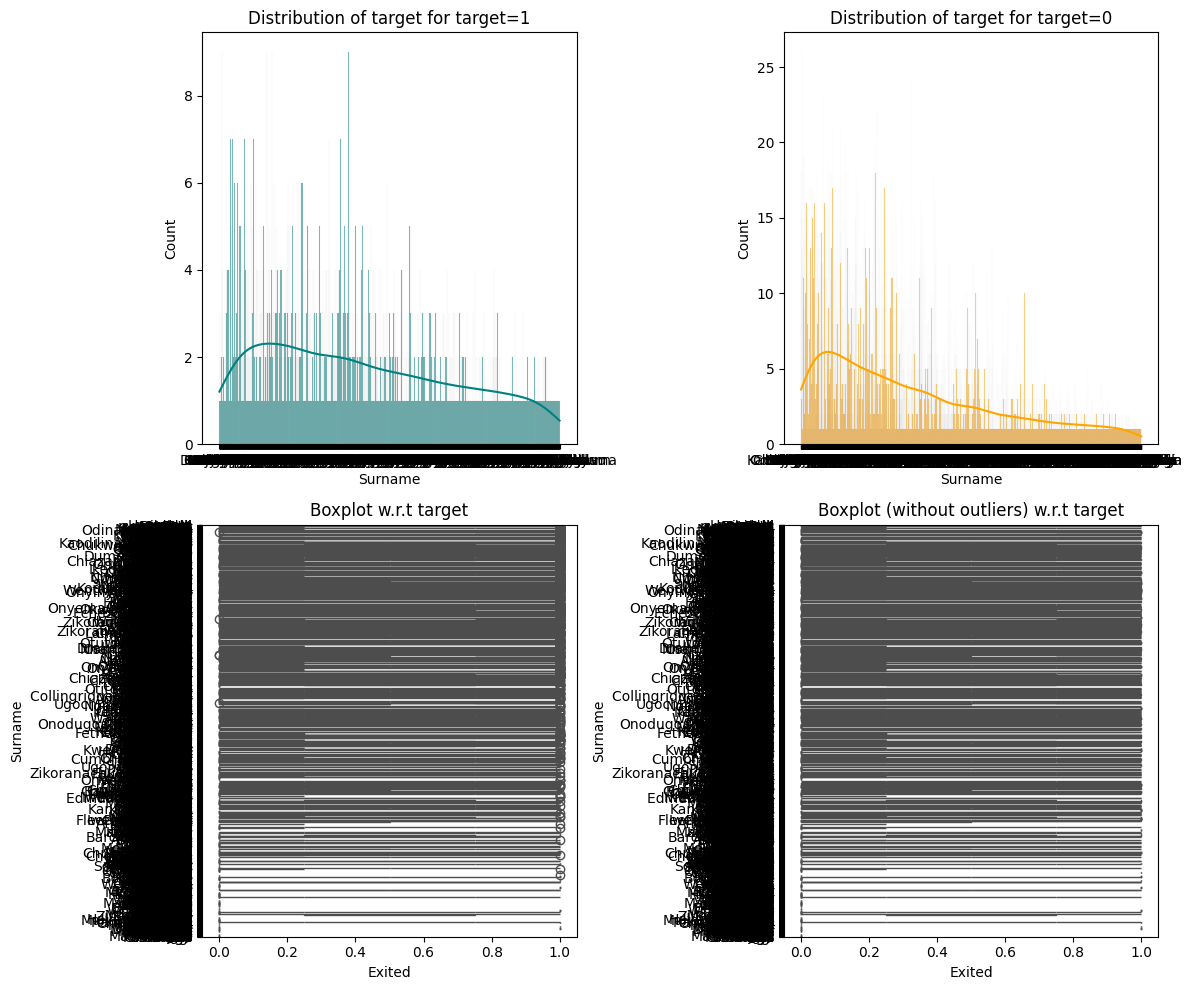

In [ ]:
distribution_plot_wrt_target(Data, "Surname", "Exited")

* No clear pattern can be seen between Target variable and Surname

#### CreditScore

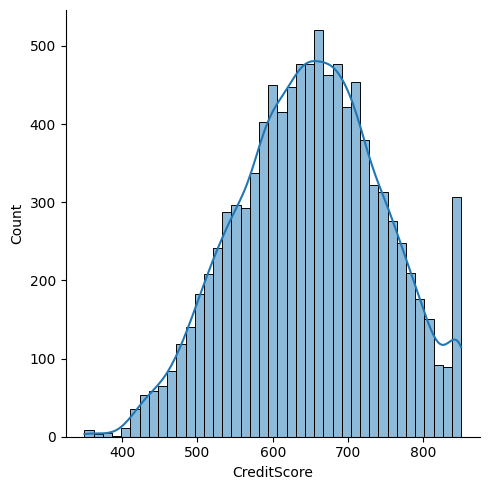

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='CreditScore', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.CreditScore.skew()

-0.07160660820092675

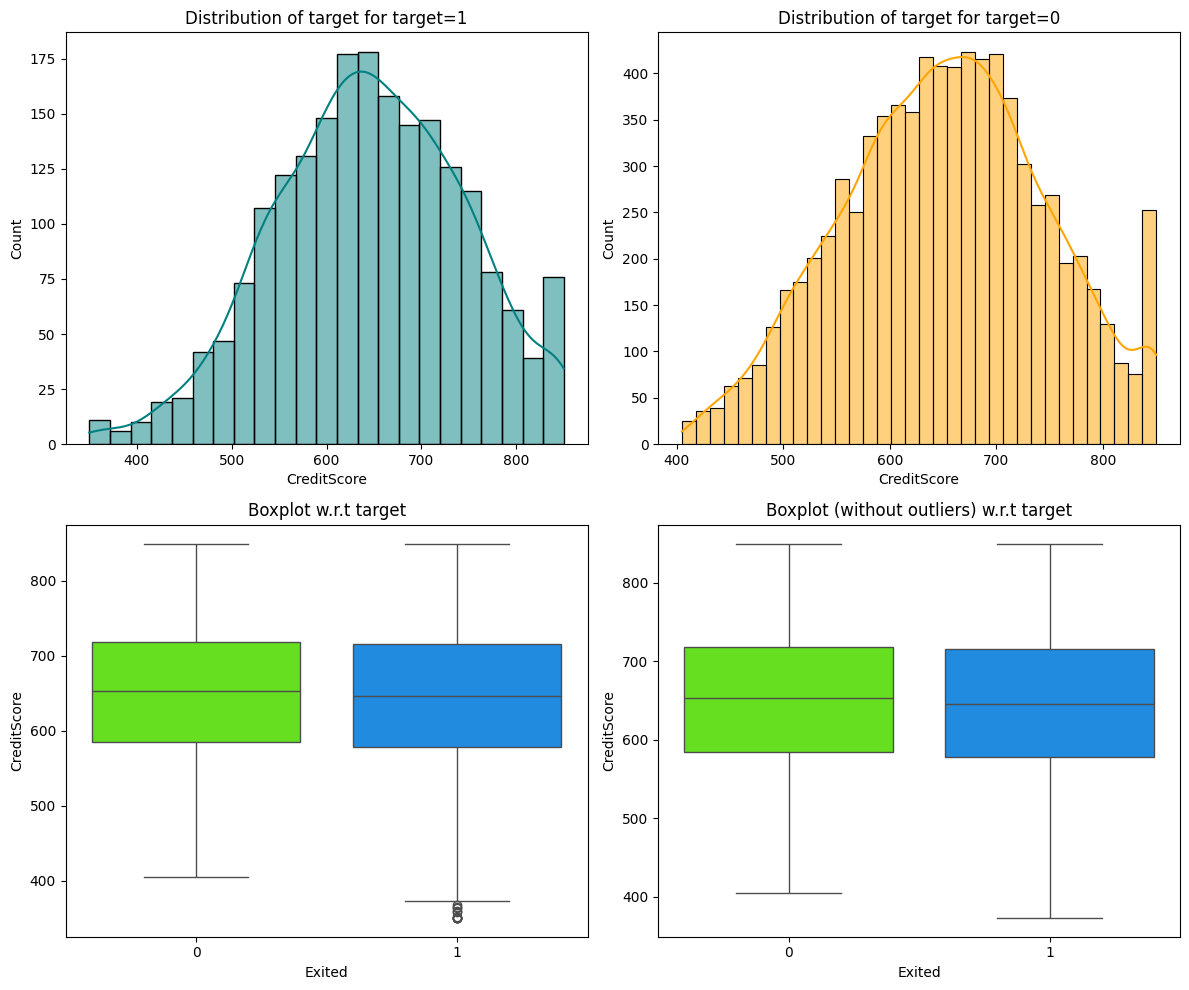

In [ ]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

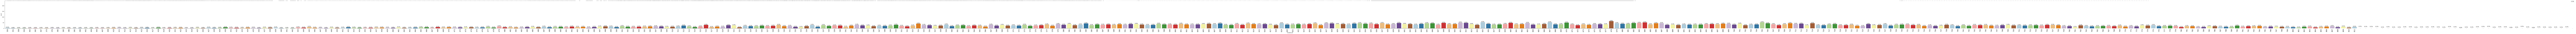

In [ ]:
labeled_barplot(Data, "CreditScore",perc=True)

* Credit score is almost uniformly distributed (lightly right skewed) across customers. No clear pattern is observed between CreditScore and Customer who are left or with the bank.

#### Geography

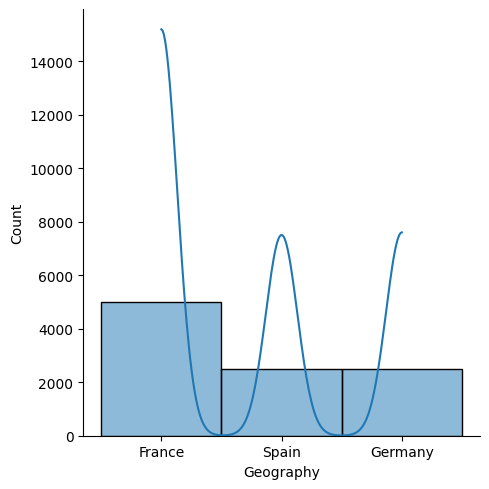

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Geography', kde=True)

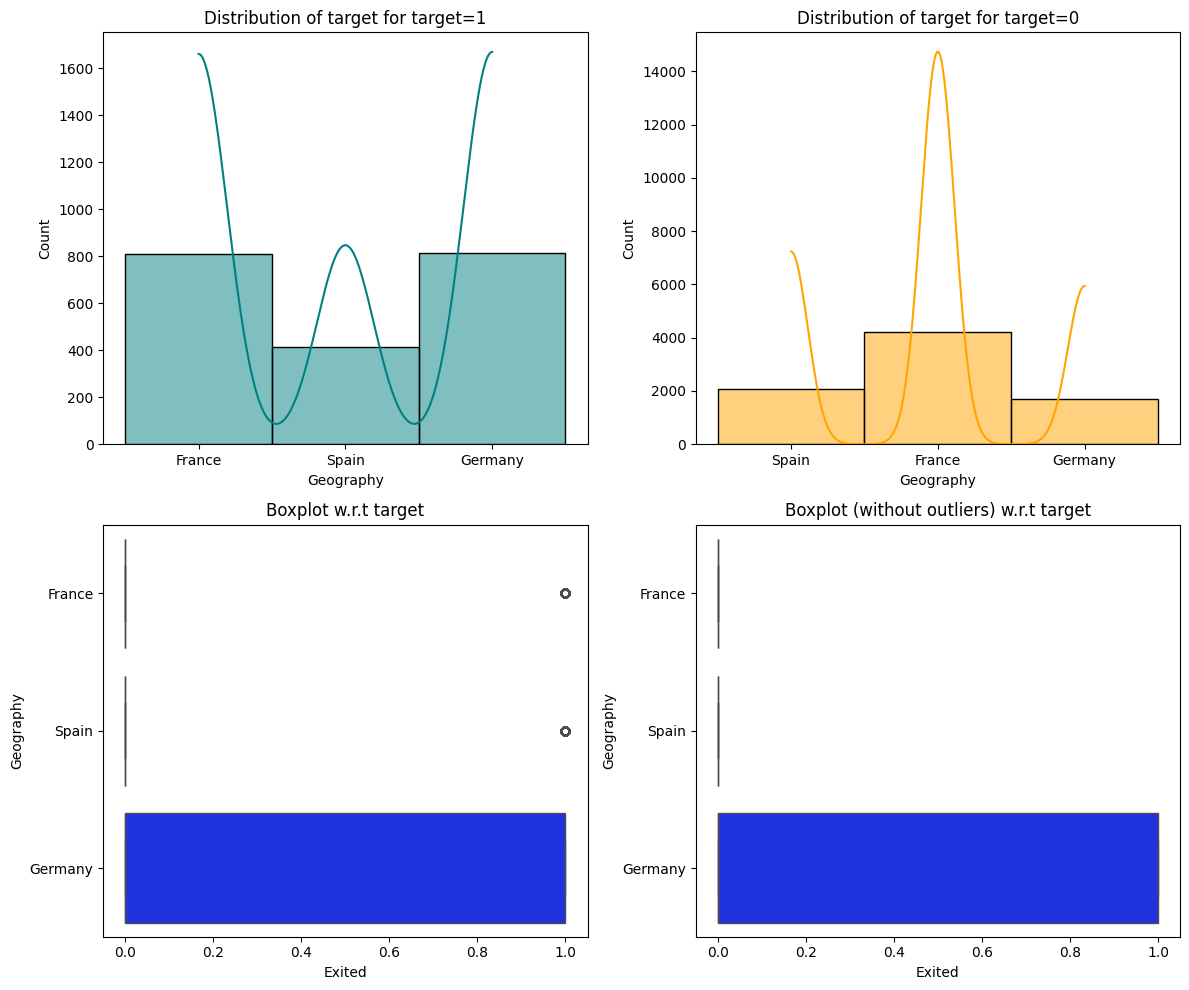

In [ ]:
distribution_plot_wrt_target(Data, "Geography", "Exited")

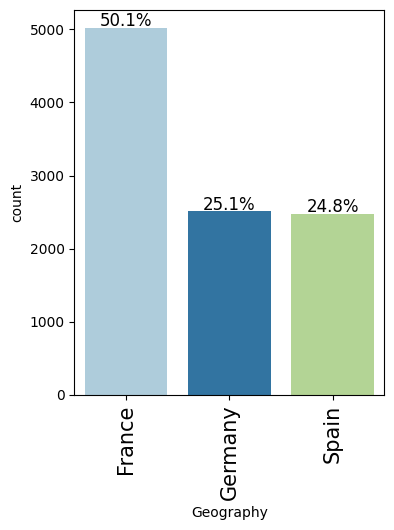

In [ ]:
labeled_barplot(Data, "Geography",perc=True)

* 50% of customers are from France.Around 28% customers from Germany left the Bank.

#### Gender

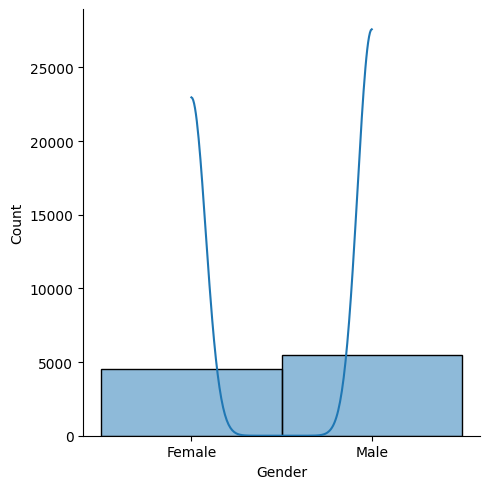

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Gender', kde=True)

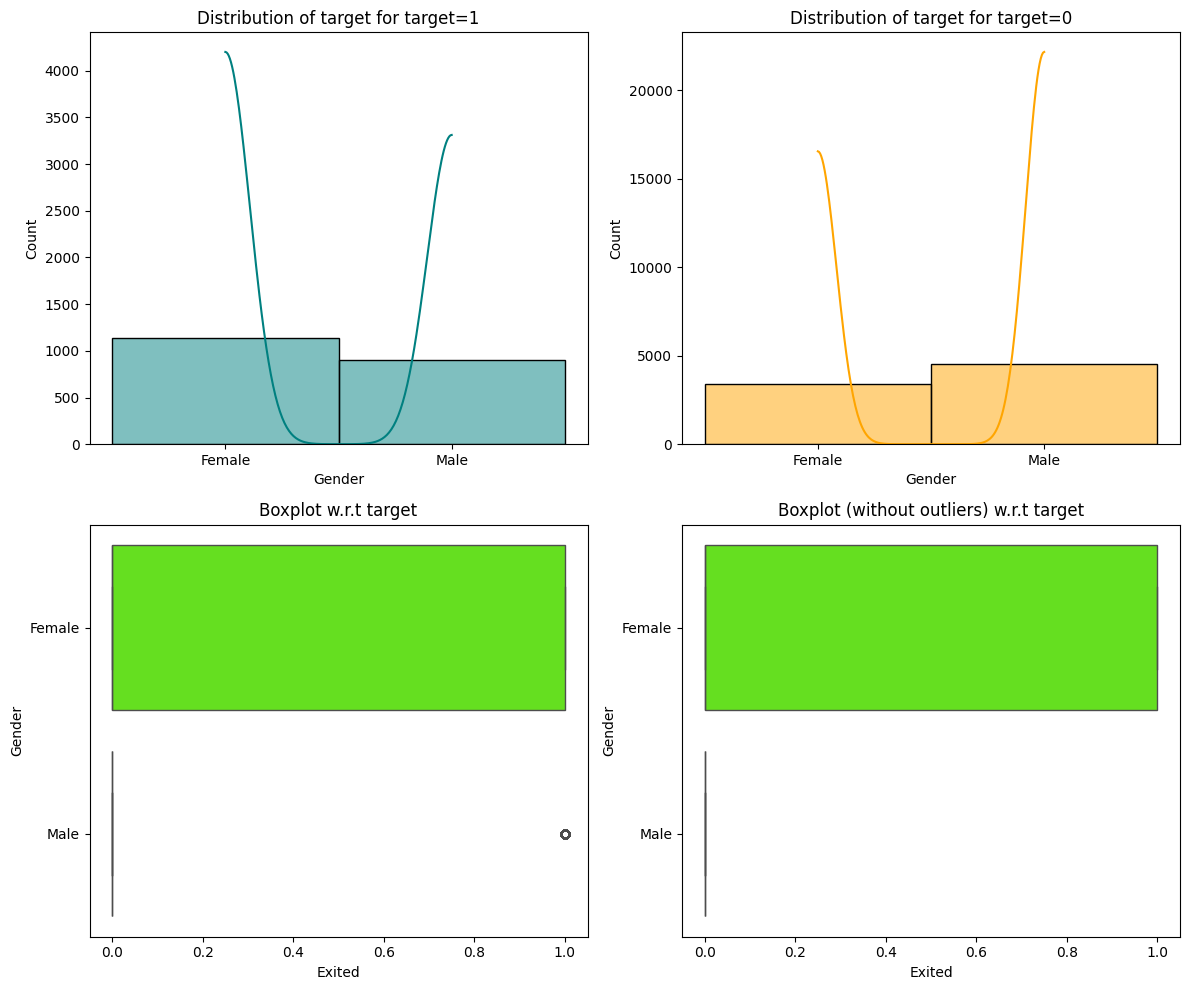

In [ ]:
distribution_plot_wrt_target(Data, "Gender", "Exited")

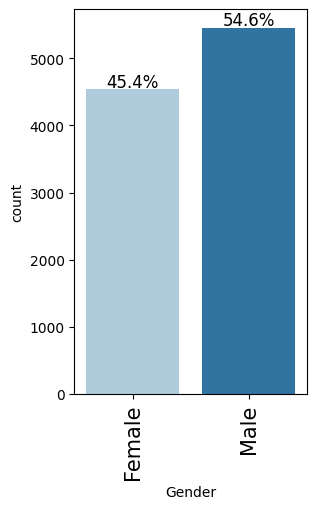

In [ ]:
labeled_barplot(Data, "Gender",perc=True)

* 54% of customers are male.Churn % is high amoung female customers.

#### Age

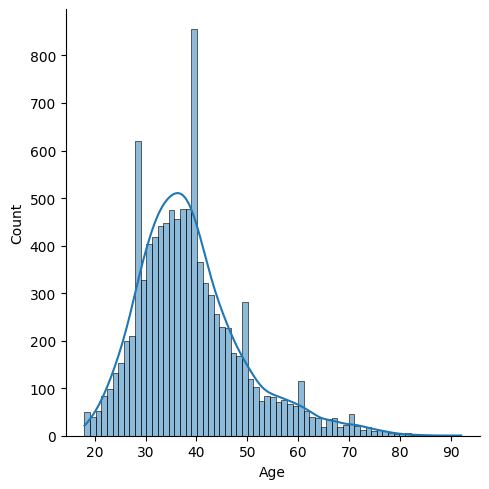

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Age', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.Age.skew()

1.0113202630234552

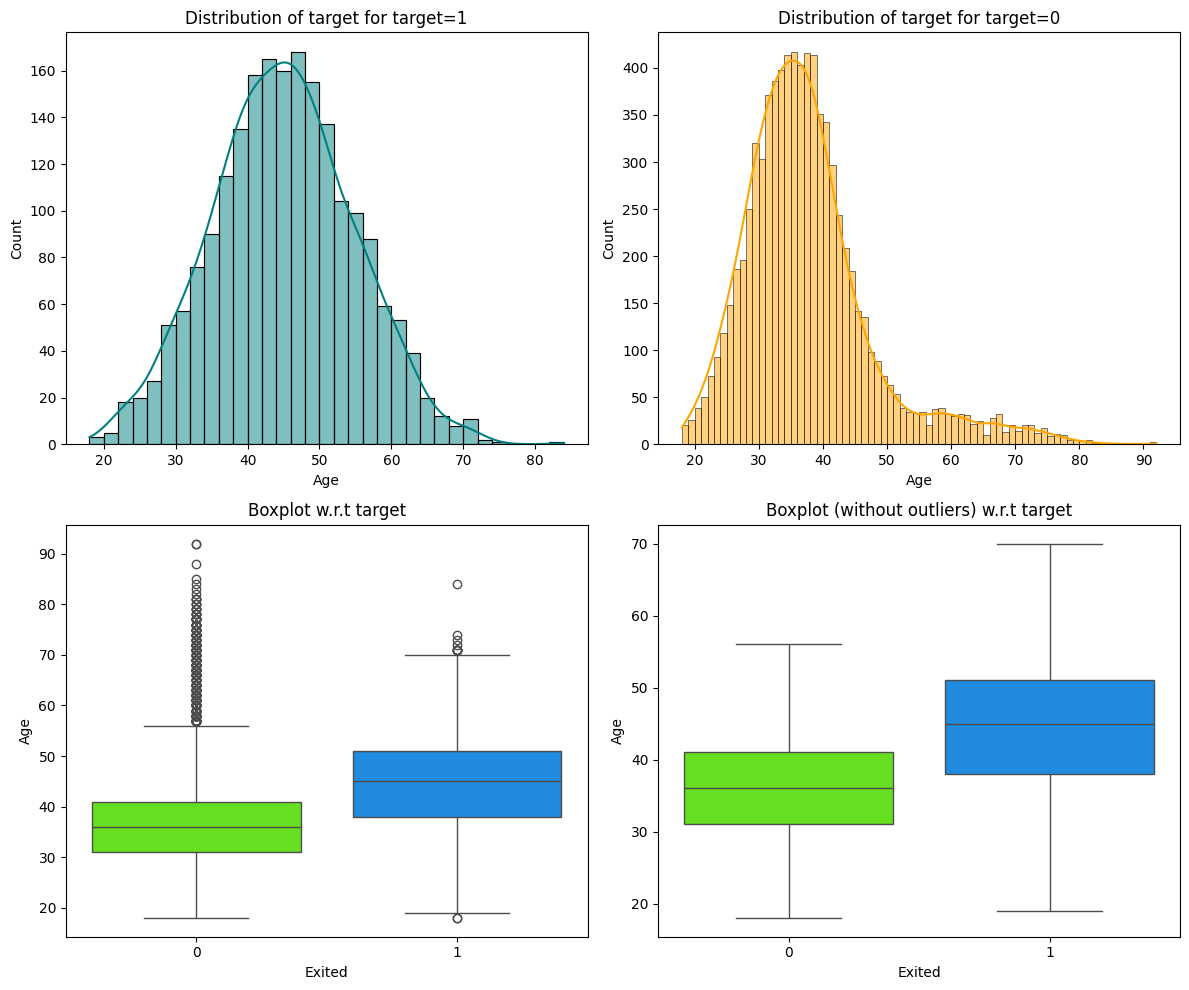

In [ ]:
distribution_plot_wrt_target(Data, "Age", "Exited")

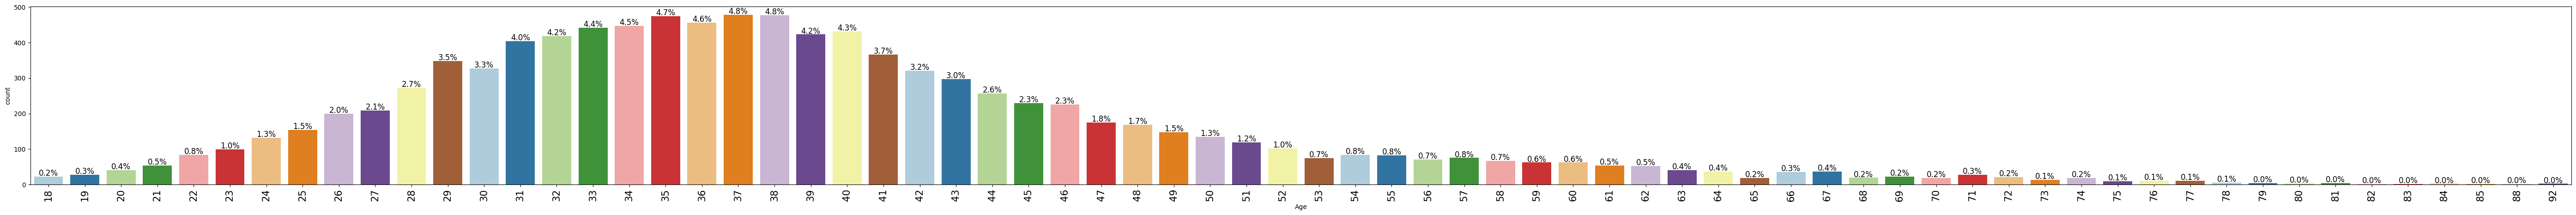

In [ ]:
labeled_barplot(Data, "Age",perc=True)

* Age distribution is right skewed. Big chunk of customers are between ages of 27-50.

#### Tenure

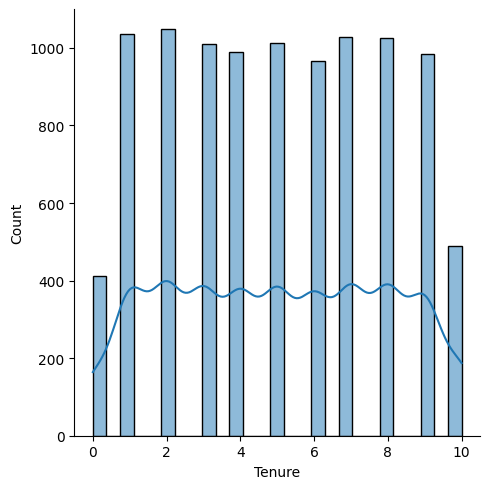

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Tenure', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.Tenure.skew()

0.01099145797717904

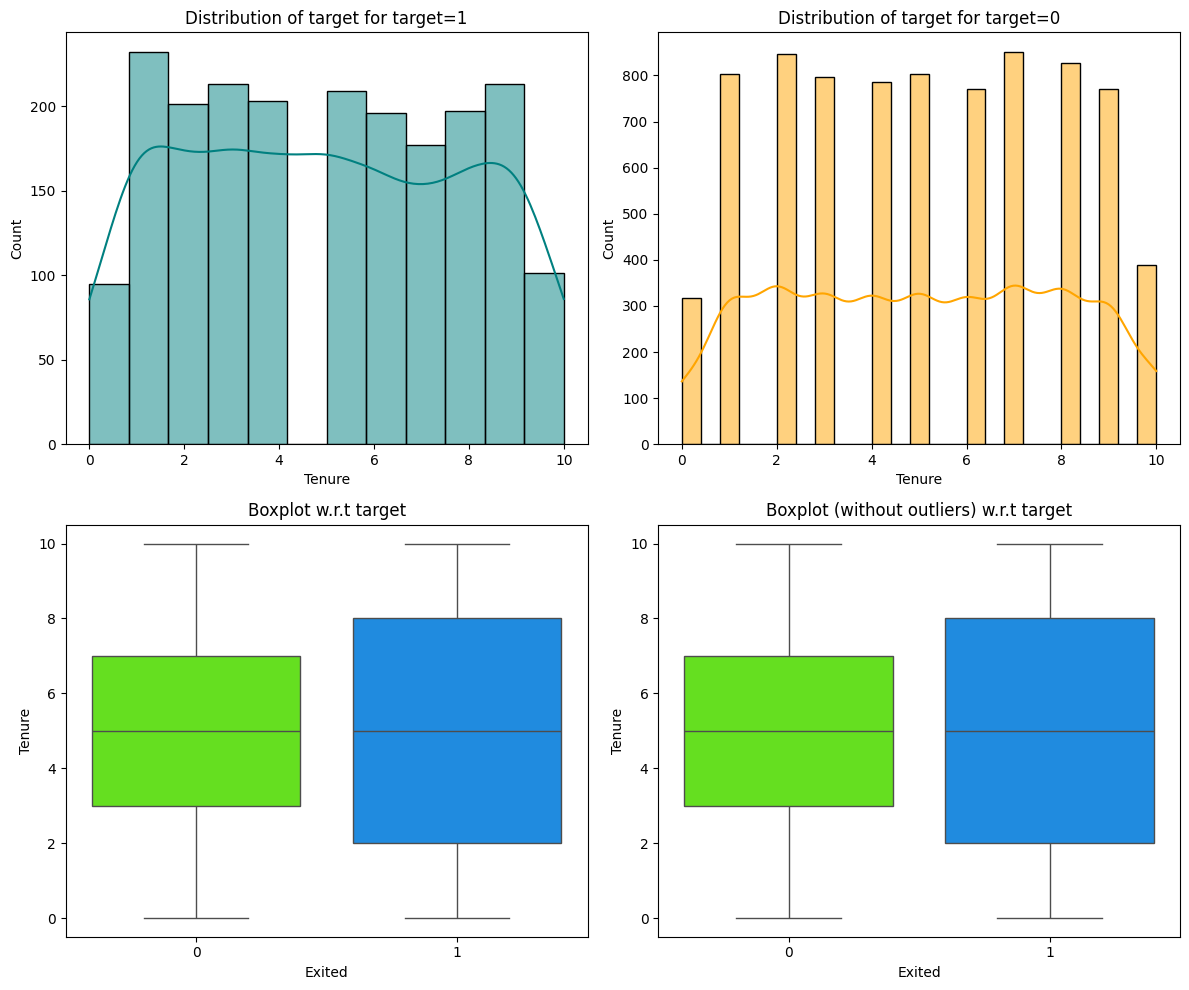

In [ ]:
distribution_plot_wrt_target(Data, "Tenure", "Exited")

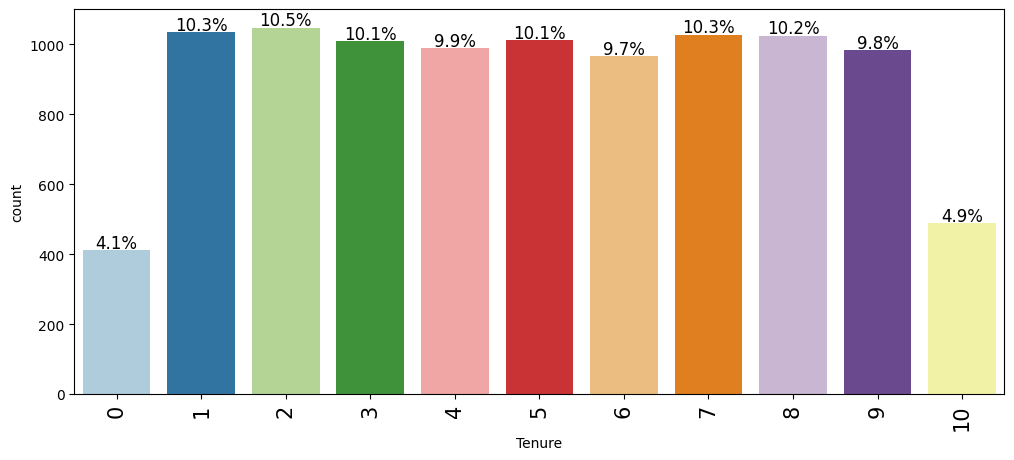

In [ ]:
labeled_barplot(Data, "Tenure",perc=True)

#### NumOfProducts

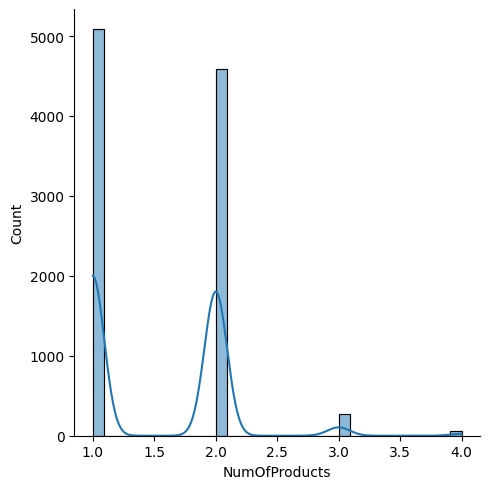

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='NumOfProducts', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.NumOfProducts.skew()

0.7455678882823168

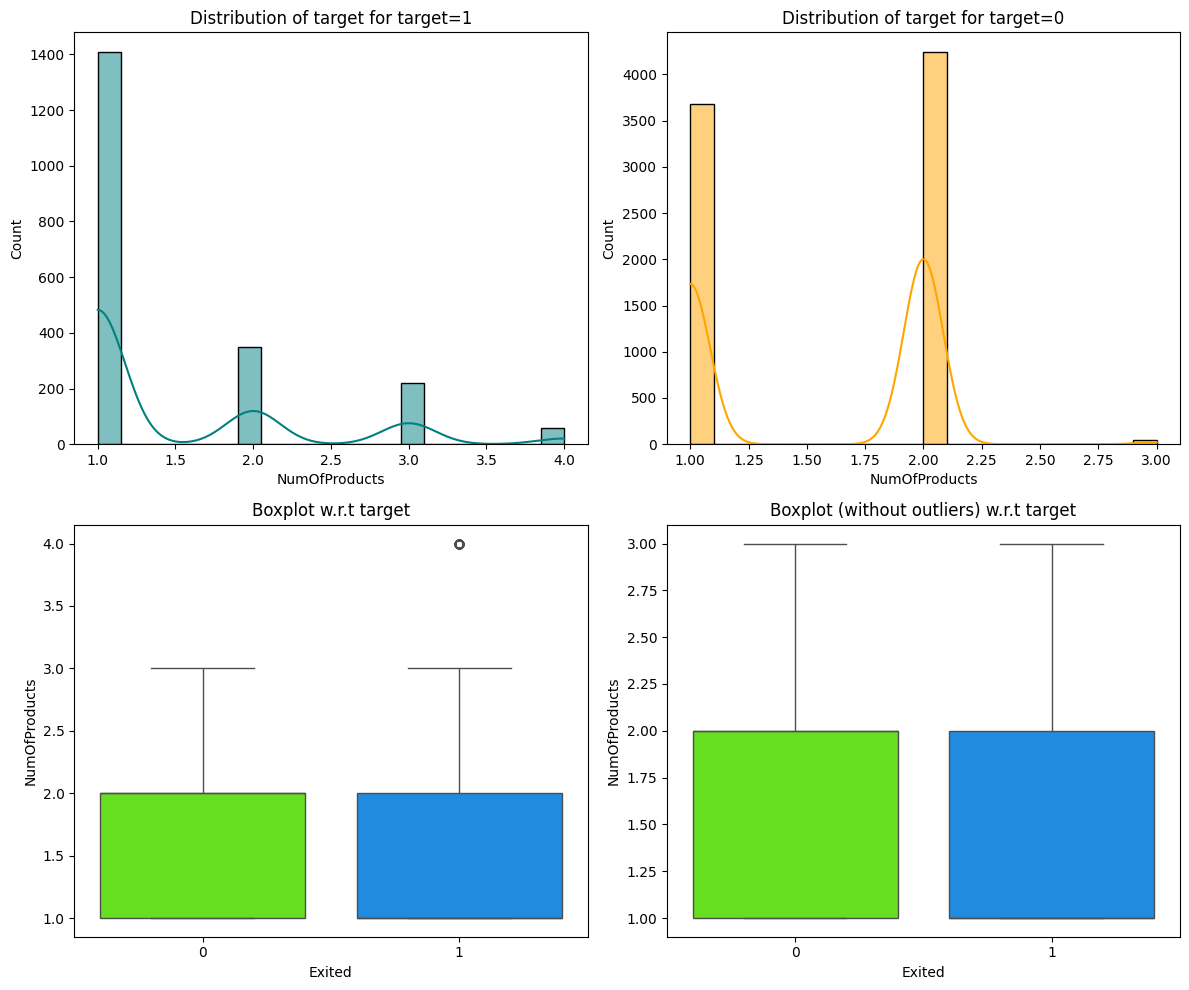

In [ ]:
distribution_plot_wrt_target(Data, "NumOfProducts", "Exited")

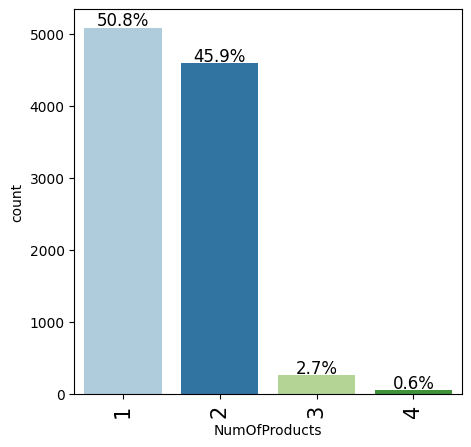

In [ ]:
labeled_barplot(Data, "NumOfProducts",perc=True)

* Majority of customers are using 1 or 2 products. Churn % is high amoung customers using 1 product.

#### Balance

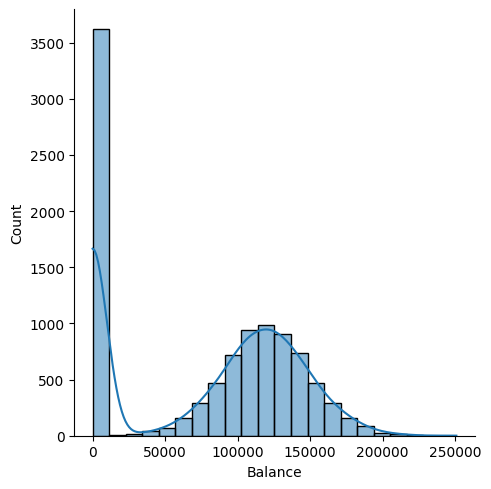

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Balance', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.Balance.skew()

-0.14110871094154384

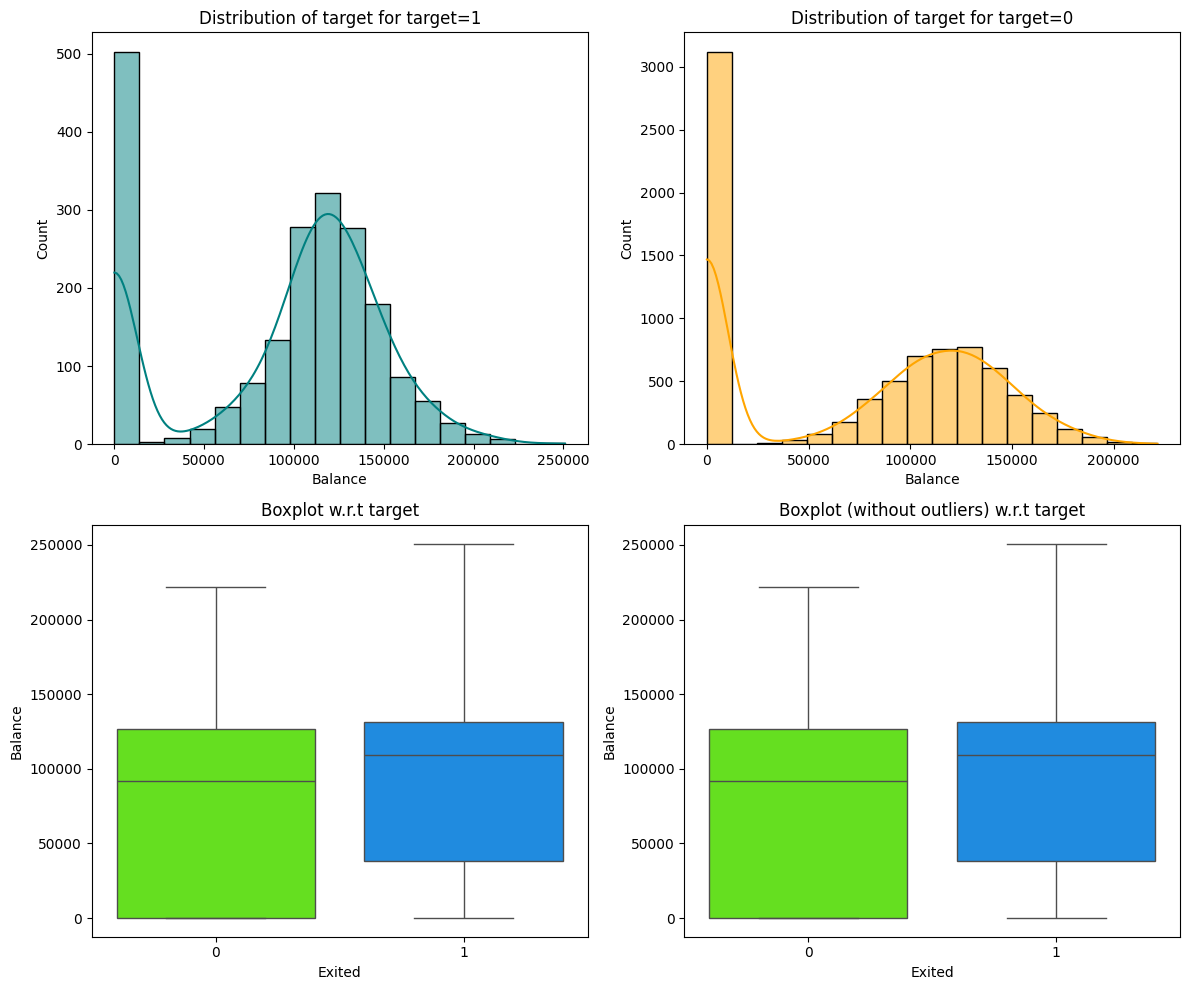

In [ ]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

* 35% of customers are maintaining minimum balance,customer balances between 50k-200k is unformly distributed.

#### HasCrCard

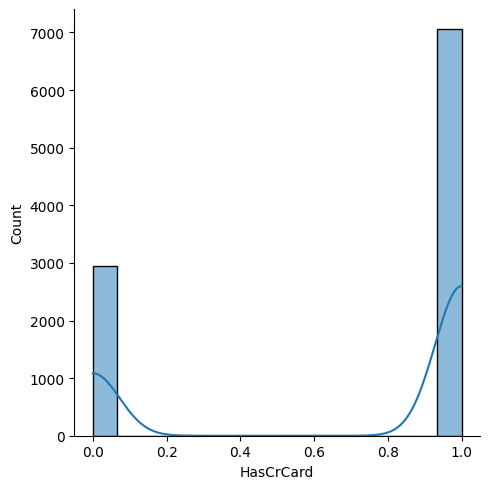

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='HasCrCard', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.HasCrCard.skew()

-0.9018115952400578

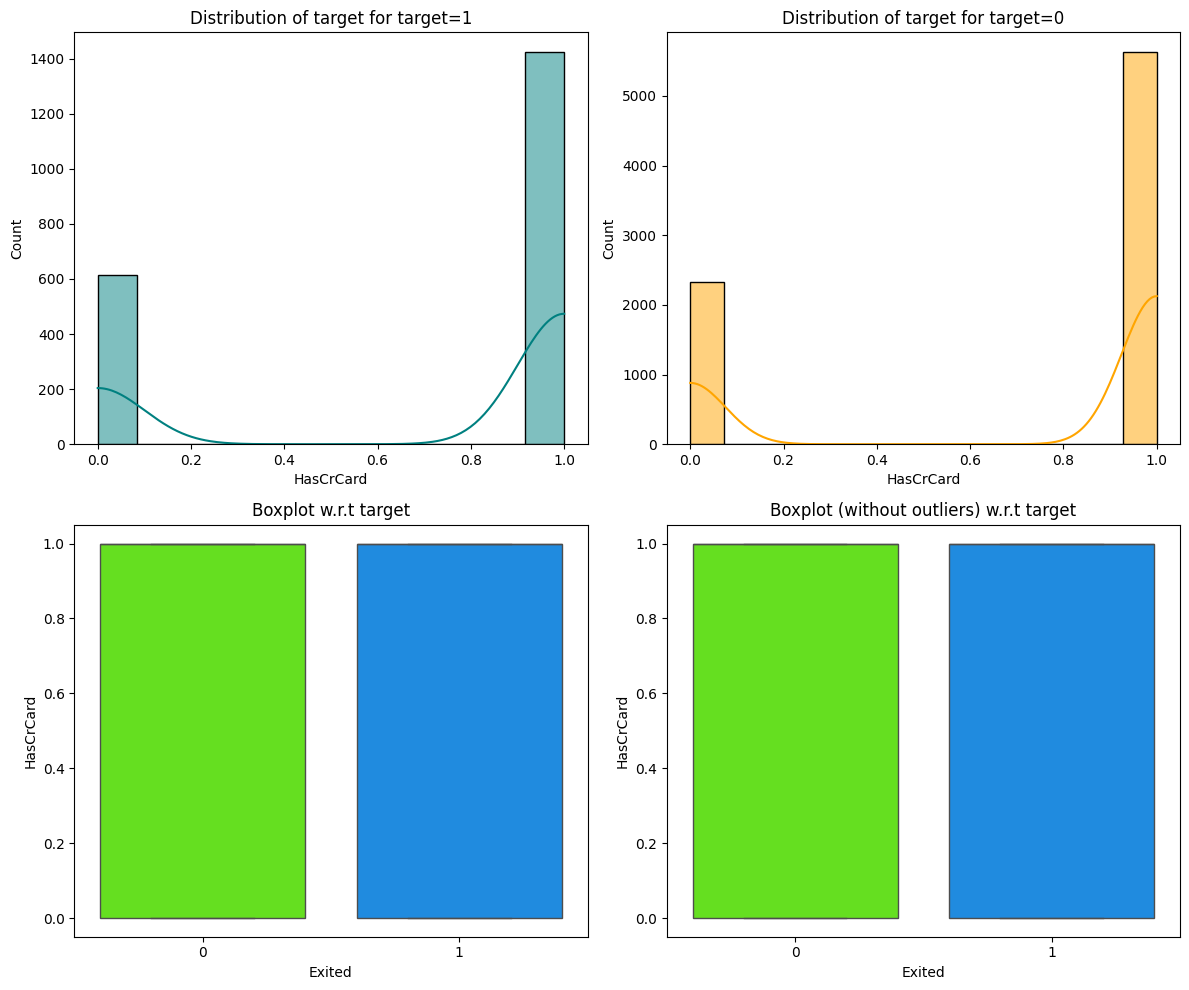

In [ ]:
distribution_plot_wrt_target(Data, "HasCrCard", "Exited")

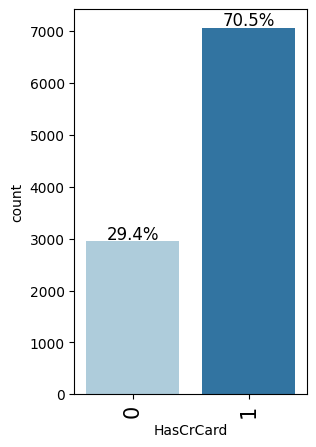

In [ ]:
labeled_barplot(Data, "HasCrCard",perc=True)

* 30% customers do not have credit card.

#### EstimatedSalary

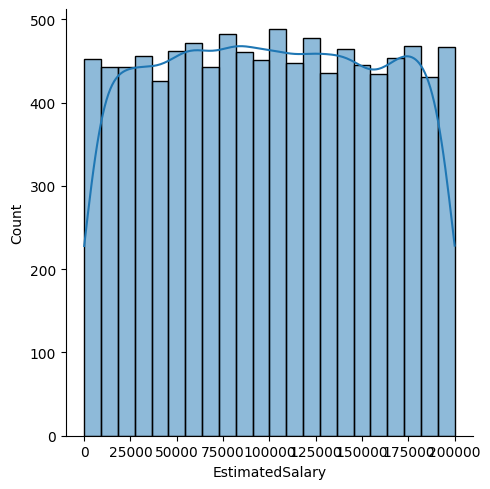

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='EstimatedSalary', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.EstimatedSalary.skew()

0.0020853576615585162

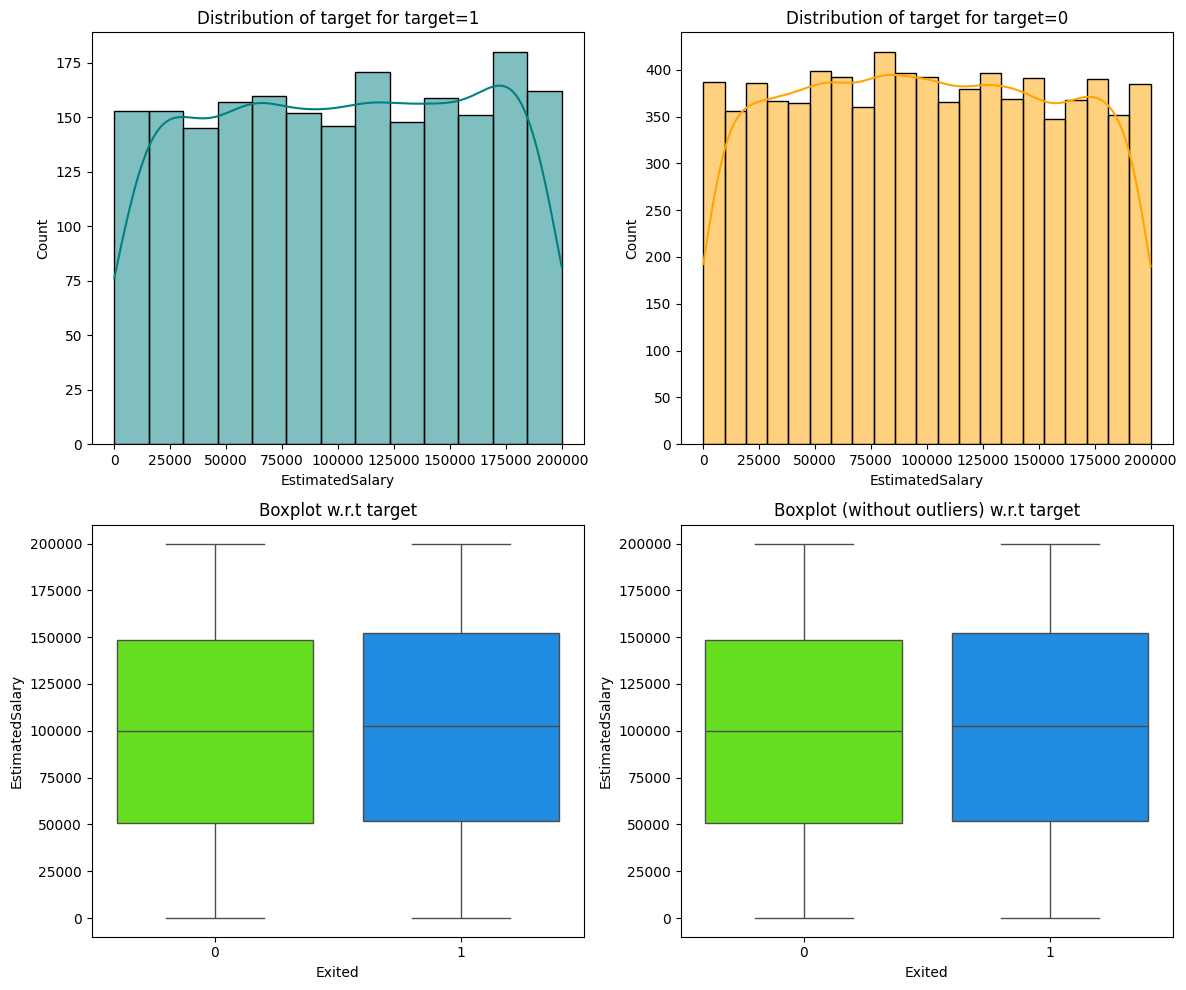

In [ ]:
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

#### isActiveMember

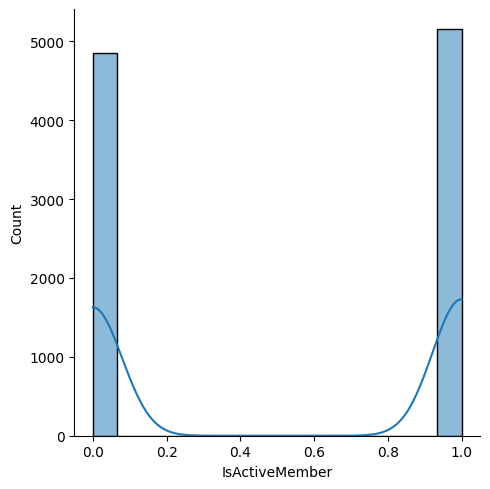

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='IsActiveMember', kde=True)

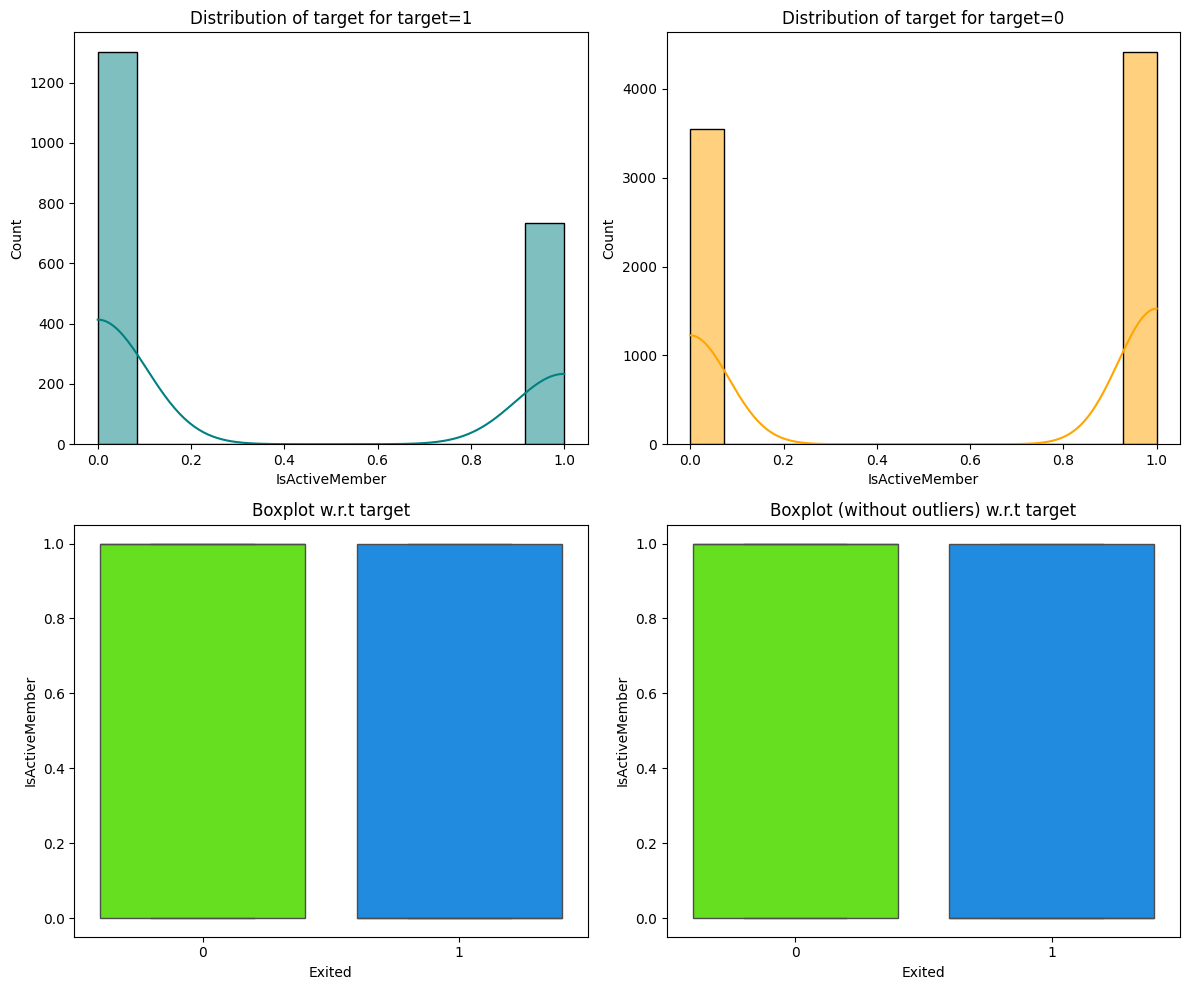

In [ ]:
distribution_plot_wrt_target(Data, "IsActiveMember", "Exited")

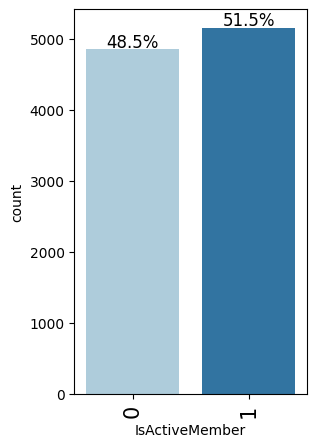

In [ ]:
labeled_barplot(Data, "IsActiveMember",perc=True)

* % Difference between Active and Inactive members is minimum. Churn % seems high amoong Inactive members.

#### Exited

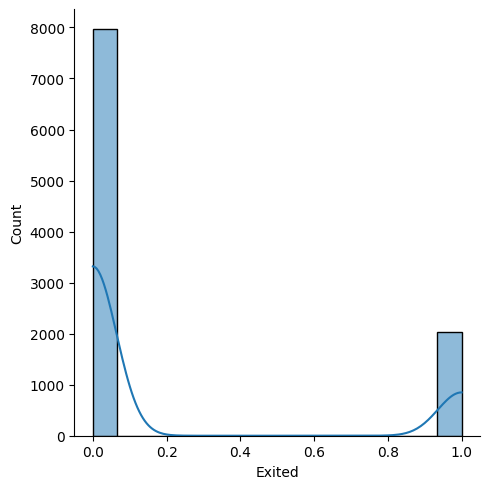

In [ ]:
#Plotting the Distribution plot
sns.displot(data=Data, x='Exited', kde=True)

In [ ]:
# Finding the skewness of the Age variable
Data.Exited.skew()

1.4716106649378211

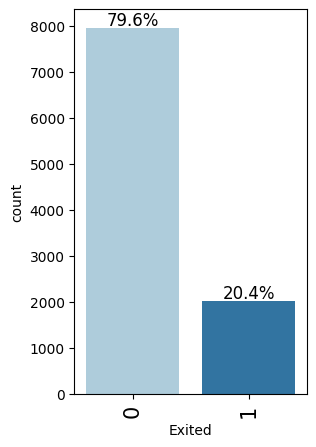

In [ ]:
labeled_barplot(Data, "Exited",perc=True)

* Close to 80% of customers are with the bank.

### Bivariate Analysis

#### Gender and Target

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


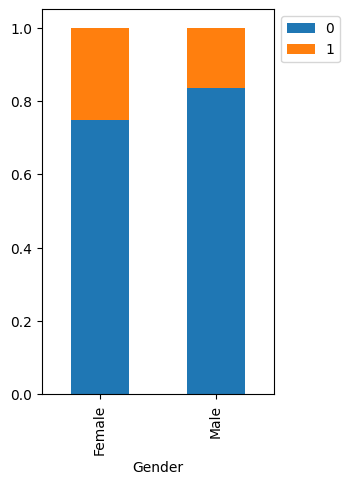

In [ ]:
stacked_barplot(Data, "Gender", "Exited")

* From the above plot, it is observed that the churn is high among femal customers.

#### Geography and Target

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


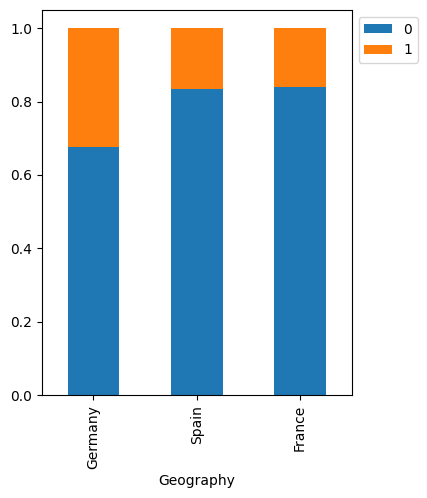

In [ ]:
stacked_barplot(Data, "Geography", "Exited")

* From the above plot, it is observed that the German customers have  high tendency to leave the bank .

#### NumOfProducts and Target

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


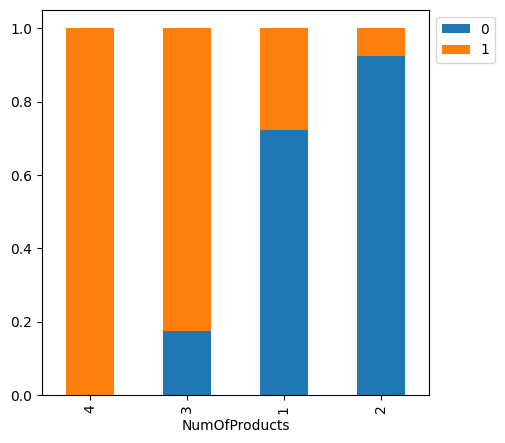

In [ ]:
stacked_barplot(Data, "NumOfProducts", "Exited")

* From the above plot, it is observed that the  customers using and 3 or 4 products have  high tendency to leave the bank . Customers using 2 products seems to stay with the bank.

#### isActiveMember and Target

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


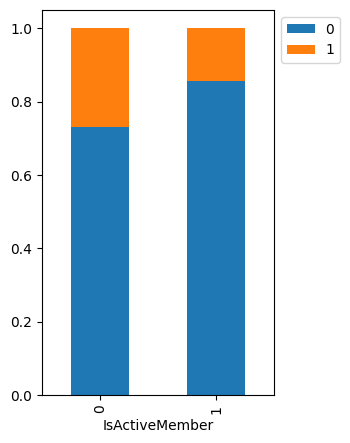

In [ ]:
stacked_barplot(Data, "IsActiveMember", "Exited")

* From the above plot,it can be inferred that Inactive members have high likelyhood to leave the bank.

#### HasCrCard and Target

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


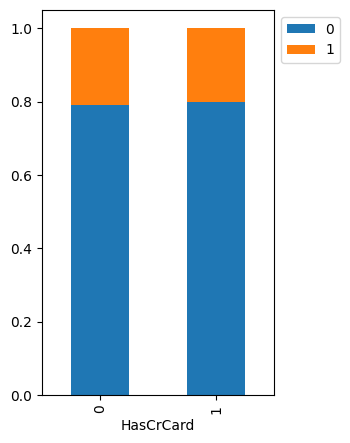

In [ ]:
stacked_barplot(Data, "HasCrCard", "Exited")

* From the above plot, customers having/not having creditcard doesn't seem to infleunce likelyhood to leave the bank.

## Data Preprocessing

### Column Binning Credit Score

- The column "CreditScore" has 460 unique variations ,  bin them in <400, 400-500,500-600,600-700,>800 bins




In [ ]:
Data["CreditScore"].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

The
below  function categorizes numerical values into predefined bins. It checks the value of `x` against specific ranges and returns a corresponding category. If `x` falls within a certain range, it returns a string representing that range. If `x` does not fall into any predefined range, it simply returns `x` itself.

In [ ]:
#Create a copy of dataset
data = Data.copy()

In [ ]:
def bin(x):

    if x > 800 :
      return '>800'
    elif x in range(700,801):
      return '700-800'
    elif x in range(600,700):
      return '600-699'
    elif x in range(500,600):
      return '500-599'
    elif x in range(0,500):
      return '<500'
    else:
      return x

In [ ]:
bin(555)


'500-599'

In [ ]:
data["CreditScore"] = data["CreditScore"].apply(bin)

In [ ]:
data["CreditScore"].unique()

array(['600-699', '500-599', '>800', '<500', '700-800'], dtype=object)

### Column Binning-Age

- The column "Age" has unique variations ,  bin them in Age <30 , 31-40,41-50 ,51-60,>60




In [ ]:
Data["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

The
below  function categorizes numerical values into predefined bins. It checks the value of `x` against specific ranges and returns a corresponding category. If `x` falls within a certain range, it returns a string representing that range. If `x` does not fall into any predefined range, it simply returns `x` itself.

In [ ]:
def ageBin(x):

    if x > 60 :
      return '>60'
    elif x in range(51,61):
      return '51-60'
    elif x in range(41,51):
      return '41-50'
    elif x in range(31,41):
      return '31-40'
    elif x in range(0,31):
      return '<30'
    else:
      return x

In [ ]:
ageBin(30)


'<30'

In [ ]:
data["Age"] = data["Age"].apply(ageBin)

In [ ]:
data["Age"].unique()

array(['41-50', '31-40', '<30', '51-60', '>60'], dtype=object)

### Column Binning-Balance

- The column "Balance" has several unique variations ,  bin them in <50k , 50-100k,100-150k,150-200k, >200k




In [ ]:
Data["Balance"].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

The
below  function categorizes numerical values into predefined bins. It checks the value of `x` against specific ranges and returns a corresponding category. If `x` falls within a certain range, it returns a string representing that range. If `x` does not fall into any predefined range, it simply returns `x` itself.

In [ ]:
def balanceBin(x):
    x= round(x)
    if x > 200000 :
      return '>200k'
    elif x in range(150001,200001):
      return '151-200k'
    elif x in range(100001,150001):
      return '101-150k'
    elif x in range(50001,100001):
      return '51-100k'
    elif x in range(0,50001):
      return '<50k'
    else:
      return x

In [ ]:
balanceBin(200000)


'151-200k'

In [ ]:
data["Balance"] = data["Balance"].apply(balanceBin)

In [ ]:
data["Balance"].unique()

array(['<50k', '51-100k', '151-200k', '101-150k', '>200k'], dtype=object)

### Column Binning-Estimated Salary

- The column "EstimatedSalary" has several unique variations ,  bin them in <50k,50-100k,100-150k, 150-200k,>200K




In [ ]:
Data["EstimatedSalary"].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
data["EstimatedSalary"] = data["EstimatedSalary"].apply(balanceBin)

In [ ]:
data["EstimatedSalary"].unique()

array(['101-150k', '51-100k', '<50k', '151-200k'], dtype=object)

### Column Binning-Surname

Surname- The column "EstimatedSalary" has several unique variations ,  bin them in




In [ ]:
data["Surname"].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
def surnameBin(x):
    if x=='Smith':
      return 'Smith'
    elif x=='Scott':
      return 'Scott'
    elif x=='Martin':
      return 'Martin'
    elif x=='Walker':
      return 'Walker'
    elif x=='Brown':
      return 'Brown'
    else:
      return 'Other'

In [ ]:
surnameBin('Hill')

'Other'

In [ ]:
data["Surname"] = data["Surname"].apply(surnameBin)

In [ ]:
data["Surname"].unique()


array(['Other', 'Scott', 'Martin', 'Smith', 'Brown', 'Walker'],
      dtype=object)

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling,same for rowNumber
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Dummy Variable Creation

### Missing Value Imputation

In [ ]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
Y = data['Exited']

In [ ]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

- There are no missing values in the numerical columns.

* Hence, we will impute the missing values in the categorical columns only using their mode.

### Encoding the categorical variables

In [ ]:
data = pd.get_dummies(data,
    columns=["Geography"],
    drop_first=True,dtype=int
)

In [ ]:
data = pd.get_dummies(data,columns=data.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [ ]:
data.shape

(10000, 12)

In [ ]:
data.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


### Train-validation-test Split

In [ ]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2, random_state = 42,shuffle = True)

In [ ]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8000, 11) (8000,)
(2000, 11) (2000,)


In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,shuffle = True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 2579 to 6090
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6400 non-null   int64  
 1   Age                6400 non-null   int64  
 2   Tenure             6400 non-null   int64  
 3   Balance            6400 non-null   float64
 4   NumOfProducts      6400 non-null   int64  
 5   HasCrCard          6400 non-null   int64  
 6   IsActiveMember     6400 non-null   int64  
 7   EstimatedSalary    6400 non-null   float64
 8   Geography_Germany  6400 non-null   float64
 9   Geography_Spain    6400 non-null   float64
 10  Gender_Male        6400 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 600.0 KB


In [ ]:
# specifying the number of classes
num_classes = 2

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

ValueError: could not convert string to float: "P'an"

In [ ]:
data['Age'].value_counts()

Age
31-40    4451
41-50    2320
<30      1968
51-60     797
>60       464
Name: count, dtype: int64

### Data Normalization

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()
cols_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_valid[cols_list] = sc.transform(X_valid[cols_list])    ## Complete the code to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


### Neural Network with SGD Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()


In [ ]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA
model_1.add(Dense(1, activation='sigmoid'))

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of
1.   SGD
2.   RMSprop
3.   Adam
4.   Adadelta
5.   Adagrad
6.   Adamax
7.   Nadam
8.   Ftrl

This is a hyper-parameter. You can play around with these optimizers to check which one performs better with a particular data.

For now, let's try **SGD** optimizer with **accuracy** as the metric and see the model's summary.

In [ ]:
metric = keras.metrics.Recall()

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.001)    # defining SGD as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metric)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Training the model**

Let's now train the model using the below piece of code. We will keep the 10% of the training data for validation.

In [ ]:
history_1 = model_1.fit(X_train, y_train, validation_split=0.1 , batch_size=32, epochs=24)


Epoch 1/24
180/180 [==============================] - 1s 3ms/step - loss: 0.4687 - recall: 0.0083 - val_loss: 0.4348 - val_recall: 0.0000e+00
Epoch 2/24
180/180 [==============================] - 0s 3ms/step - loss: 0.4658 - recall: 0.0042 - val_loss: 0.4331 - val_recall: 0.0000e+00
Epoch 3/24
180/180 [==============================] - 0s 3ms/step - loss: 0.4654 - recall: 0.0050 - val_loss: 0.4316 - val_recall: 0.0000e+00
Epoch 4/24
180/180 [==============================] - 0s 3ms/step - loss: 0.4635 - recall: 0.0075 - val_loss: 0.4301 - val_recall: 0.0000e+00
Epoch 5/24
180/180 [==============================] - 0s 3ms/step - loss: 0.4602 - recall: 0.0142 - val_loss: 0.4287 - val_recall: 0.0000e+00
Epoch 6/24
180/180 [==============================] - 0s 2ms/step - loss: 0.4597 - recall: 0.0142 - val_loss: 0.4273 - val_recall: 0.0000e+00
Epoch 7/24
180/180 [==============================] - 0s 3ms/step - loss: 0.4601 - recall: 0.0192 - val_loss: 0.4259 - val_recall: 0.0000e+00
Epoch 

From the above summary, we can see that this architecture will train a total of **9,345** parameters i.e. weights and biases in the network.

Loss **Function**

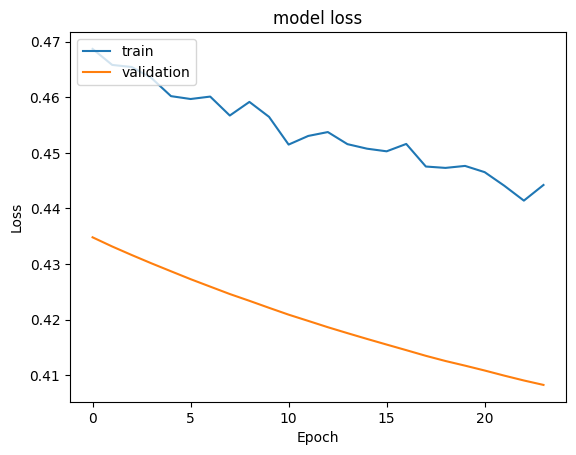

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

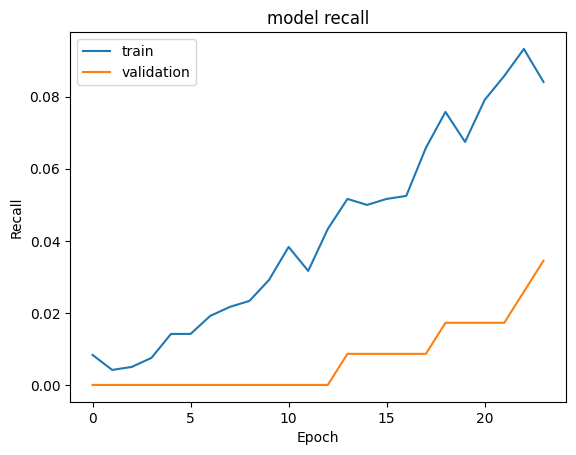

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_valid)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid, y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5083
           1       0.70      0.08      0.15      1317

    accuracy                           0.80      6400
   macro avg       0.75      0.54      0.52      6400
weighted avg       0.78      0.80      0.74      6400



In [ ]:
#classification report
cr=classification_report(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1273
           1       0.60      0.07      0.13       327

    accuracy                           0.80      1600
   macro avg       0.70      0.53      0.51      1600
weighted avg       0.76      0.80      0.73      1600



**Confusion matrix**

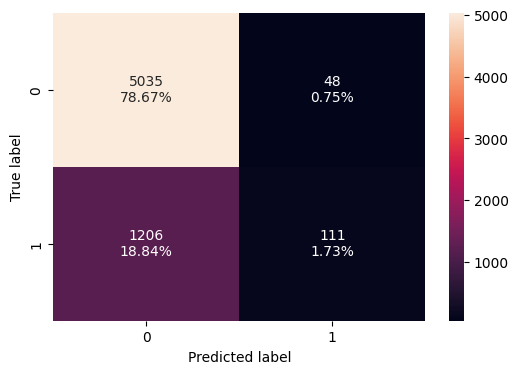

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

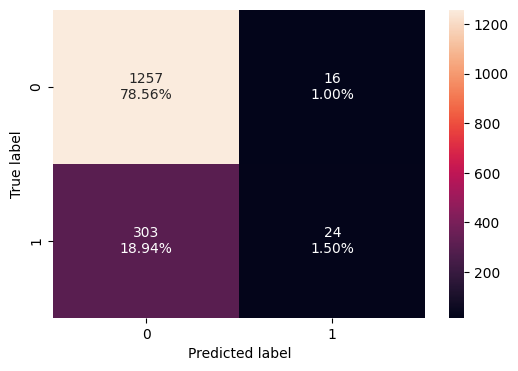

In [ ]:
make_confusion_matrix(y_valid, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Neural Network with Adam Optimizer and Dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___